# <span style="color:blue">Desafío - Regresión Lineal</span>

## <span style="color:orange">Cargamos bibliotecas y datos</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data=pd.read_csv('Fish.csv')
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## <span style="color:orange">Preparamos y observamos los datos</span>

In [3]:
# Eliminamos datos nulos y verificamos 
data.dropna()
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [4]:
# Obtenemos descriptivos 

data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## <span style="color:blue">1.- Crear columna con el dato volumen del pez</span>

In [5]:
# Calcular el volumen
data['Volume'] = np.pi * (data['Width']/2)**2 * data['Height']

data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,146.215854
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,181.707071
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,214.391723
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,198.477454
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,257.609344


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
 7   Volume   159 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.1+ KB


## <span style="color:blue">2.- Verificar correlaciones entre variables</span>

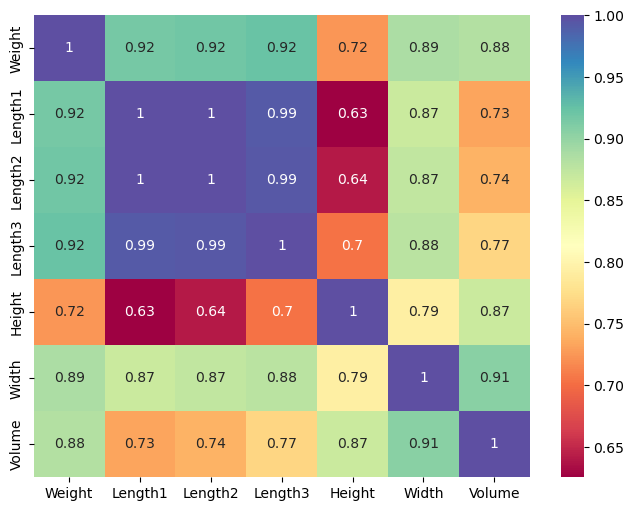

In [7]:
# Filtrar solo las columnas numéricas
data_num = data.select_dtypes(include=[np.number])

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(data_num.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

### <span style="color:green">Análisis numérico:</span>

- **Volume y Weight**: La correlación entre el volumen y el peso es de 0.88.
- **Volume y Length3**: La correlación más alta entre el volumen y el largo, se observa con Length3 donde es 0.77.
- **Volume y Width**: La correlación más alta la encontramos entre el volumen y el ancho, que es de 0.91.
- **Volume y Height**: La correlación con la altura es de 0.87.

### <span style="color:green">Análisis entre variables:</span>

El volumen tiene una alta correlación con el peso (0.88), lo que indica que el volumen es una variable relevante para predecir el peso. Sin embargo, es importante notar lo siguiente:

- **Width y Volume**: La correlación más alta con el volumen se observa con el ancho. Esto nos indica que el volumen está influenciado por el ancho, echo que igualmente es esperado porque el volumen se calcula usando el ancho.

- **Length3 y Volume**: La correlación entre Length3 y el volumen es alta, pero menor que la correlación entre el ancho y el volumen.

- **Height y Volume**: La correlación entre la altura y el volumen es de 0.87 indicando una fuerte relación, esto es porque al igual que con el ancho el volumen también se calcula utilizando la altura.

Aunque el volumen tiene una fuerte correlación con el peso, las variables Length3 y Width ya muestran correlaciones significativas con el peso (0.92 y 0.89 respectivamente).

### <span style="color: orange">Conclusión:</span> 
Añadir la variable "Volume" no incrementa significativamente la correlación con respecto a otras variables como Length3 y Width, que ya tienen una fuerte correlación con el peso. La variable "Volume" no aporta información significativa en la correlación.

## <span style="color:blue">3.- Construcción de modelo de regresión lineal</span>

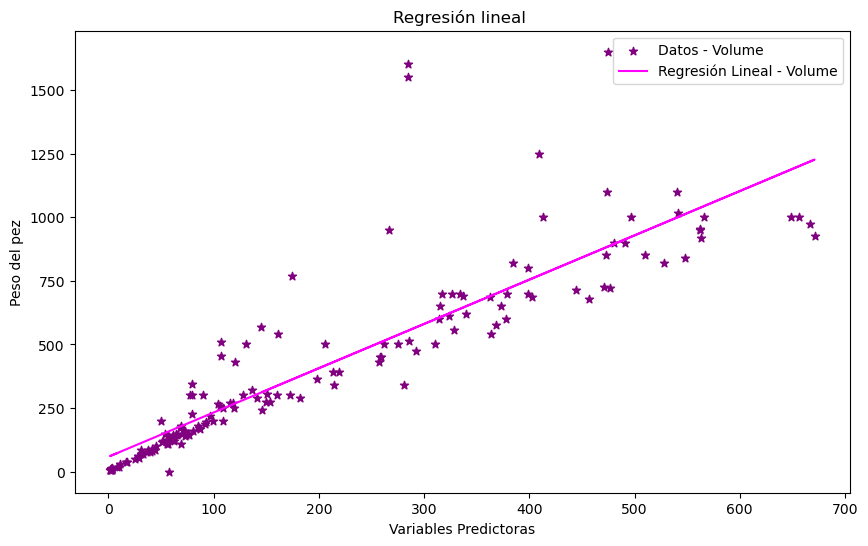

MSE (Error Cuadrático Medio): 28283.910
EMSE (Error Cuadrático Medio Explicado): 0.222
Coeficiente de Determinación (R2): 0.778
MAE (Error Absoluto Medio): 90.974


In [8]:
# Se crea una función para facilitar la creación del modelo de regresión lineal y su posterior análisis

def analisis_regresion(data, variables_predictoras=None, especie=None):
    # Si se proporciona una especie, filtrar los datos para incluir solo esa especie específica
    if especie:
        data = data[data['Species'] == especie]
    
    # Si no se proporcionan variables predictoras, usar 'Volume' como la variable predictora por defecto
    if variables_predictoras is None:
        variables_predictoras = ['Volume']
    
    # Definir las variables predictoras (X) y la variable de respuesta (y)
    # X contiene las variables que se utilizarán para predecir el peso (y)
    X = data[variables_predictoras]
    y = data['Weight']

    # Agregar una constante al predictor (esto incluye un intercepto en el modelo)
    X = sm.add_constant(X)

    # Crear el modelo de regresión lineal utilizando OLS (Mínimos Cuadrados Ordinarios)
    modelo = sm.OLS(y, X).fit()

    # Obtener las predicciones del modelo para los valores en X
    prediccion = modelo.predict(X)

    # Calcular MSE (Error Cuadrático Medio) para evaluar la precisión del modelo
    mse = ((y - prediccion) ** 2).mean()

    # Calcular EMSE (Error Cuadrático Medio Explicado) para medir la varianza explicada por el modelo
    emse = mse / ((y - y.mean()) ** 2).mean()

    # Calcular Coeficiente de Determinación - R2, que indica la proporción de varianza en y explicada por X
    r2 = modelo.rsquared

    # Calcular MAE (Error Absoluto Medio) para medir la magnitud media de los errores en las predicciones
    mae = abs(y - prediccion).mean()

    # Construir el texto de resultados para presentar el modelo
    resultados = (f'MSE (Error Cuadrático Medio): {mse:.3f}\n'
                  f'EMSE (Error Cuadrático Medio Explicado): {emse:.3f}\n'
                  f'Coeficiente de Determinación (R2): {r2:.3f}\n'
                  f'MAE (Error Absoluto Medio): {mae:.3f}')

    # Graficar la regresión lineal para cada variable predictora
    plt.figure(figsize=(10, 6))  
    for var in variables_predictoras:
        # Graficar los datos originales (variable predictora vs peso)
        plt.scatter(data[var], data['Weight'], label=f"Datos - {var}", c='purple', marker='*')
        # Graficar la línea de regresión predicha por el modelo
        plt.plot(data[var], modelo.predict(X), color='magenta', label=f"Regresión Lineal - {var}")

    # Establecer el título del gráfico, que indica si es para una especie específica o para todos los datos
    plt.title(f"Regresión lineal {'para '+especie if especie else ''}")
    # Etiquetar el eje X según la variable predictora
    plt.xlabel("Variables Predictoras")
    # Etiquetar el eje Y como "Peso del pez"
    plt.ylabel("Peso del pez")
    # Mostrar la leyenda para diferenciar entre los datos y la línea de regresión
    plt.legend()
    # Mostrar el gráfico generado
    plt.show()

    # Devolver el texto de resultados para su análisis posterior
    return resultados

# Mostramos los resutados

resultados_volumen_peso = analisis_regresion(data)
print(resultados_volumen_peso)




### <span style="color:orange">Evaluación del modelo:</span>

1. **MSE (Error Cuadrático Medio)**: 28283.910

    - El MSE mide la media de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo. En este caso, el valor de MSE indica que hay una cantidad alta de error en las predicciones del modelo.
    
    
2. **EMSE (Error Cuadrático Medio Explicado)**: 0.222

    - El EMSE es la proporción de la varianza explicada por el modelo en comparación con la varianza total. Un valor de 0.222 significa que el 22.2% de la varianza de los datos está siendo explicada por el modelo. Este valor nos indica que el modelo no está tomando la mayoría de la variabilidad en los datos.
    

3. **Coeficiente de Determinación (R2)**: 0.778

    - El R2 mide la proporción de la varianza en la variable de respuesta (en este caso, peso) que es explicada por las variables predictoras (en este caso, el volumen). Un R2 de 0.778 significa que el 77.8% de la variabilidad en el peso de los peces se puede explicar mediante el volumen. Aunque este es un valor alto, no es lo suficientemente cercano a 1, indicando que hay una parte considerable de la variabilidad que no está siendo capturada por el modelo.
    
    
4. **MAE (Error Absoluto Medio)**: 90.974

    - El MAE mide el error absoluto medio entre las predicciones del modelo y los valores reales. En este caso, un MAE de 90.974 indica que las predicciones del modelo se desvían del valor real por aproximadamente 91 unidades de peso. Esto sugiere que el modelo tiene un error considerable en las predicciones.
    
    
**Evaluación General del Modelo**: El R² de 0.778 indica que el modelo tiene capacidad para explicar la variabilidad del peso de los peces a partir del volumen. Pero el MSE alto y el EMSE bajo, indican una cantidad considerable de error en las predicciones, sugiriendo que el modelo no esta tomando en cuenta todos los factores relevantes que afectan el peso.

## <span style="color:blue">4.- Aplicación del modelo a cada especie de pez</span>


Resultados para la especie: Bream


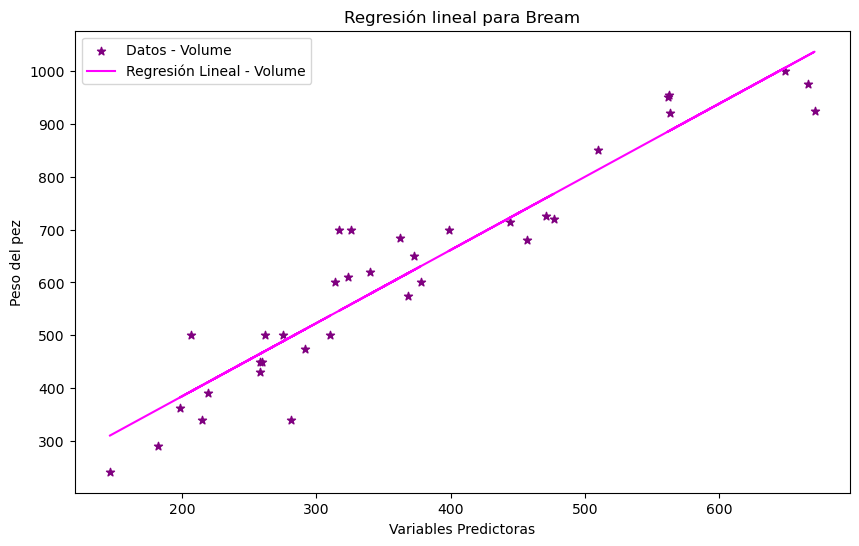

MSE (Error Cuadrático Medio): 4348.347
EMSE (Error Cuadrático Medio Explicado): 0.102
Coeficiente de Determinación (R2): 0.898
MAE (Error Absoluto Medio): 53.692

Resultados para la especie: Roach


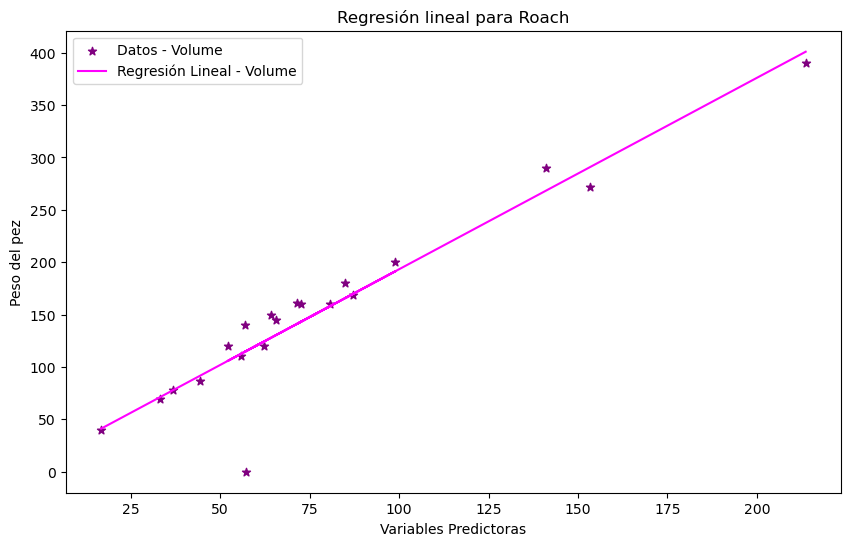

MSE (Error Cuadrático Medio): 835.834
EMSE (Error Cuadrático Medio Explicado): 0.112
Coeficiente de Determinación (R2): 0.888
MAE (Error Absoluto Medio): 16.004

Resultados para la especie: Whitefish


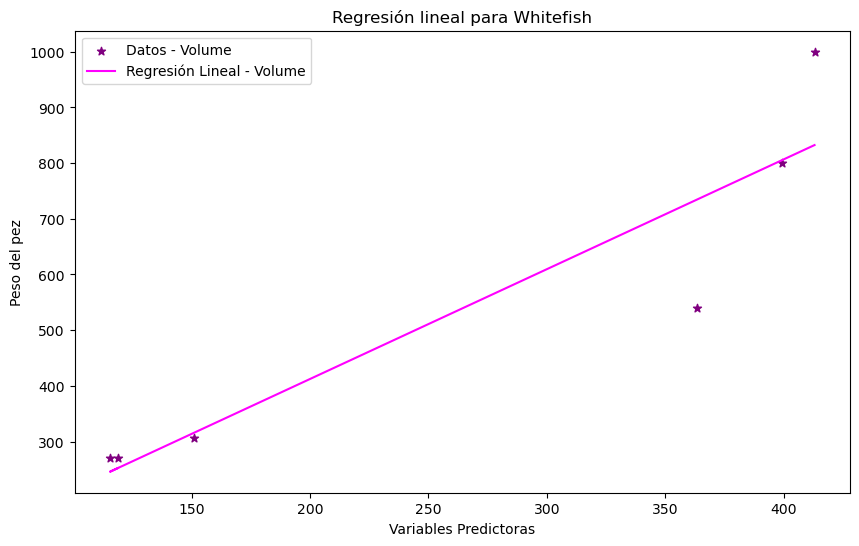

MSE (Error Cuadrático Medio): 11147.577
EMSE (Error Cuadrático Medio Explicado): 0.140
Coeficiente de Determinación (R2): 0.860
MAE (Error Absoluto Medio): 69.796

Resultados para la especie: Parkki


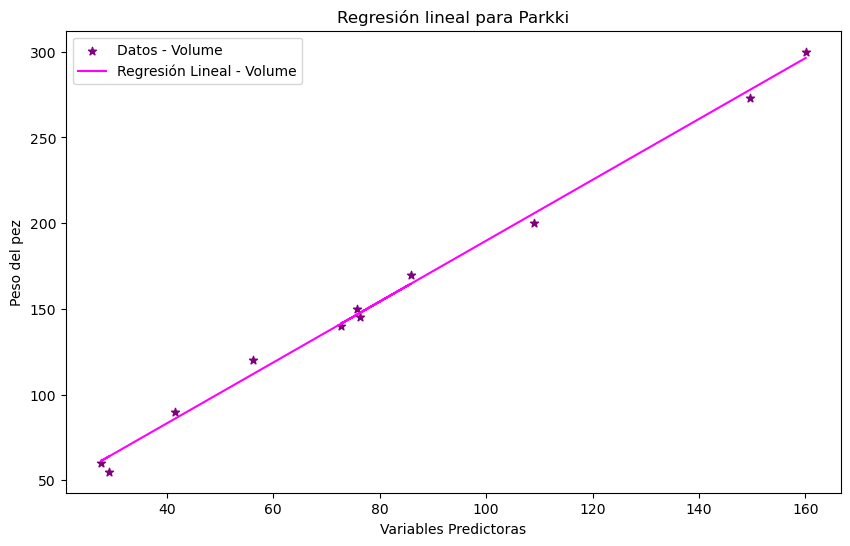

MSE (Error Cuadrático Medio): 25.589
EMSE (Error Cuadrático Medio Explicado): 0.005
Coeficiente de Determinación (R2): 0.995
MAE (Error Absoluto Medio): 4.475

Resultados para la especie: Perch


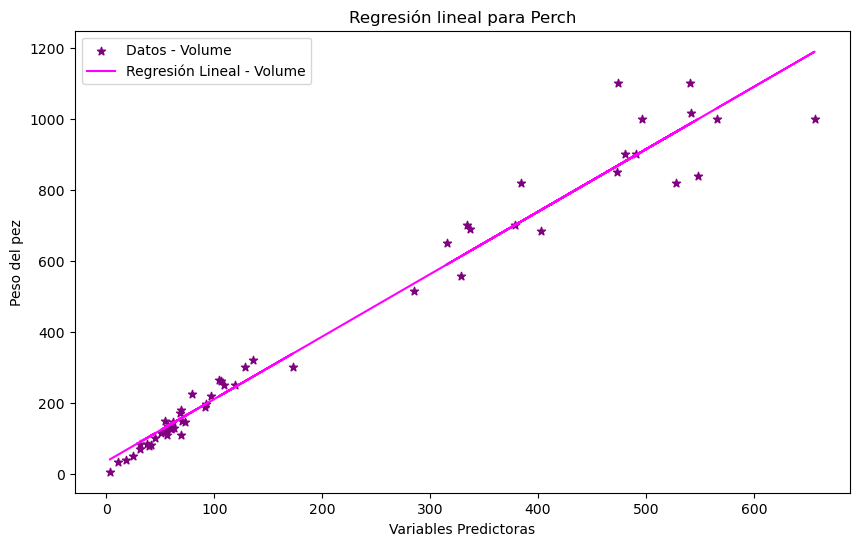

MSE (Error Cuadrático Medio): 3835.981
EMSE (Error Cuadrático Medio Explicado): 0.032
Coeficiente de Determinación (R2): 0.968
MAE (Error Absoluto Medio): 40.183

Resultados para la especie: Pike


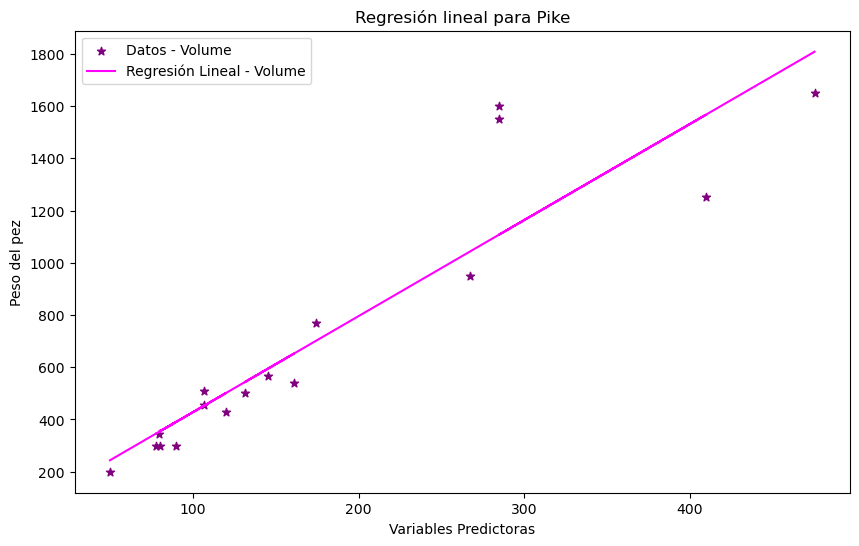

MSE (Error Cuadrático Medio): 36222.431
EMSE (Error Cuadrático Medio Explicado): 0.158
Coeficiente de Determinación (R2): 0.842
MAE (Error Absoluto Medio): 125.087

Resultados para la especie: Smelt


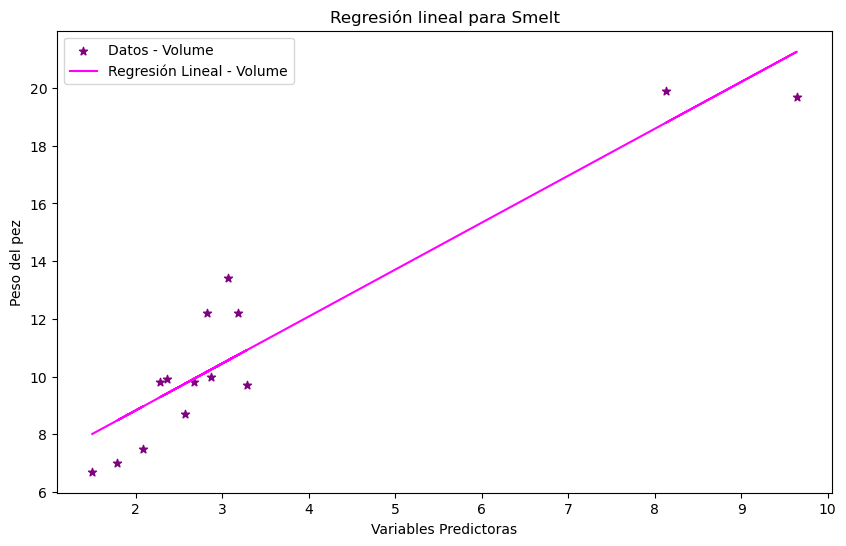

MSE (Error Cuadrático Medio): 1.933
EMSE (Error Cuadrático Medio Explicado): 0.122
Coeficiente de Determinación (R2): 0.878
MAE (Error Absoluto Medio): 1.202


In [9]:
# Aplicar la función a cada especie y mostrar resultados

# Obtener una lista de las especies únicas presentes en el conjunto de datos
especies = data['Species'].unique()

# Iterar sobre cada especie para aplicar el análisis de regresión individualmente
for especie in especies:
    # Imprimir el nombre de la especie que se está analizando
    print(f"\nResultados para la especie: {especie}")
    
    # Aplicar la función de análisis de regresión a los datos filtrados por la especie actual
    # La función 'analisis_regresion' se aplica solo a los datos correspondientes a la especie actual
    resultados_por_especie = analisis_regresion(data, especie=especie)
    
    # Imprimir los resultados obtenidos para la especie actual
    print(resultados_por_especie)




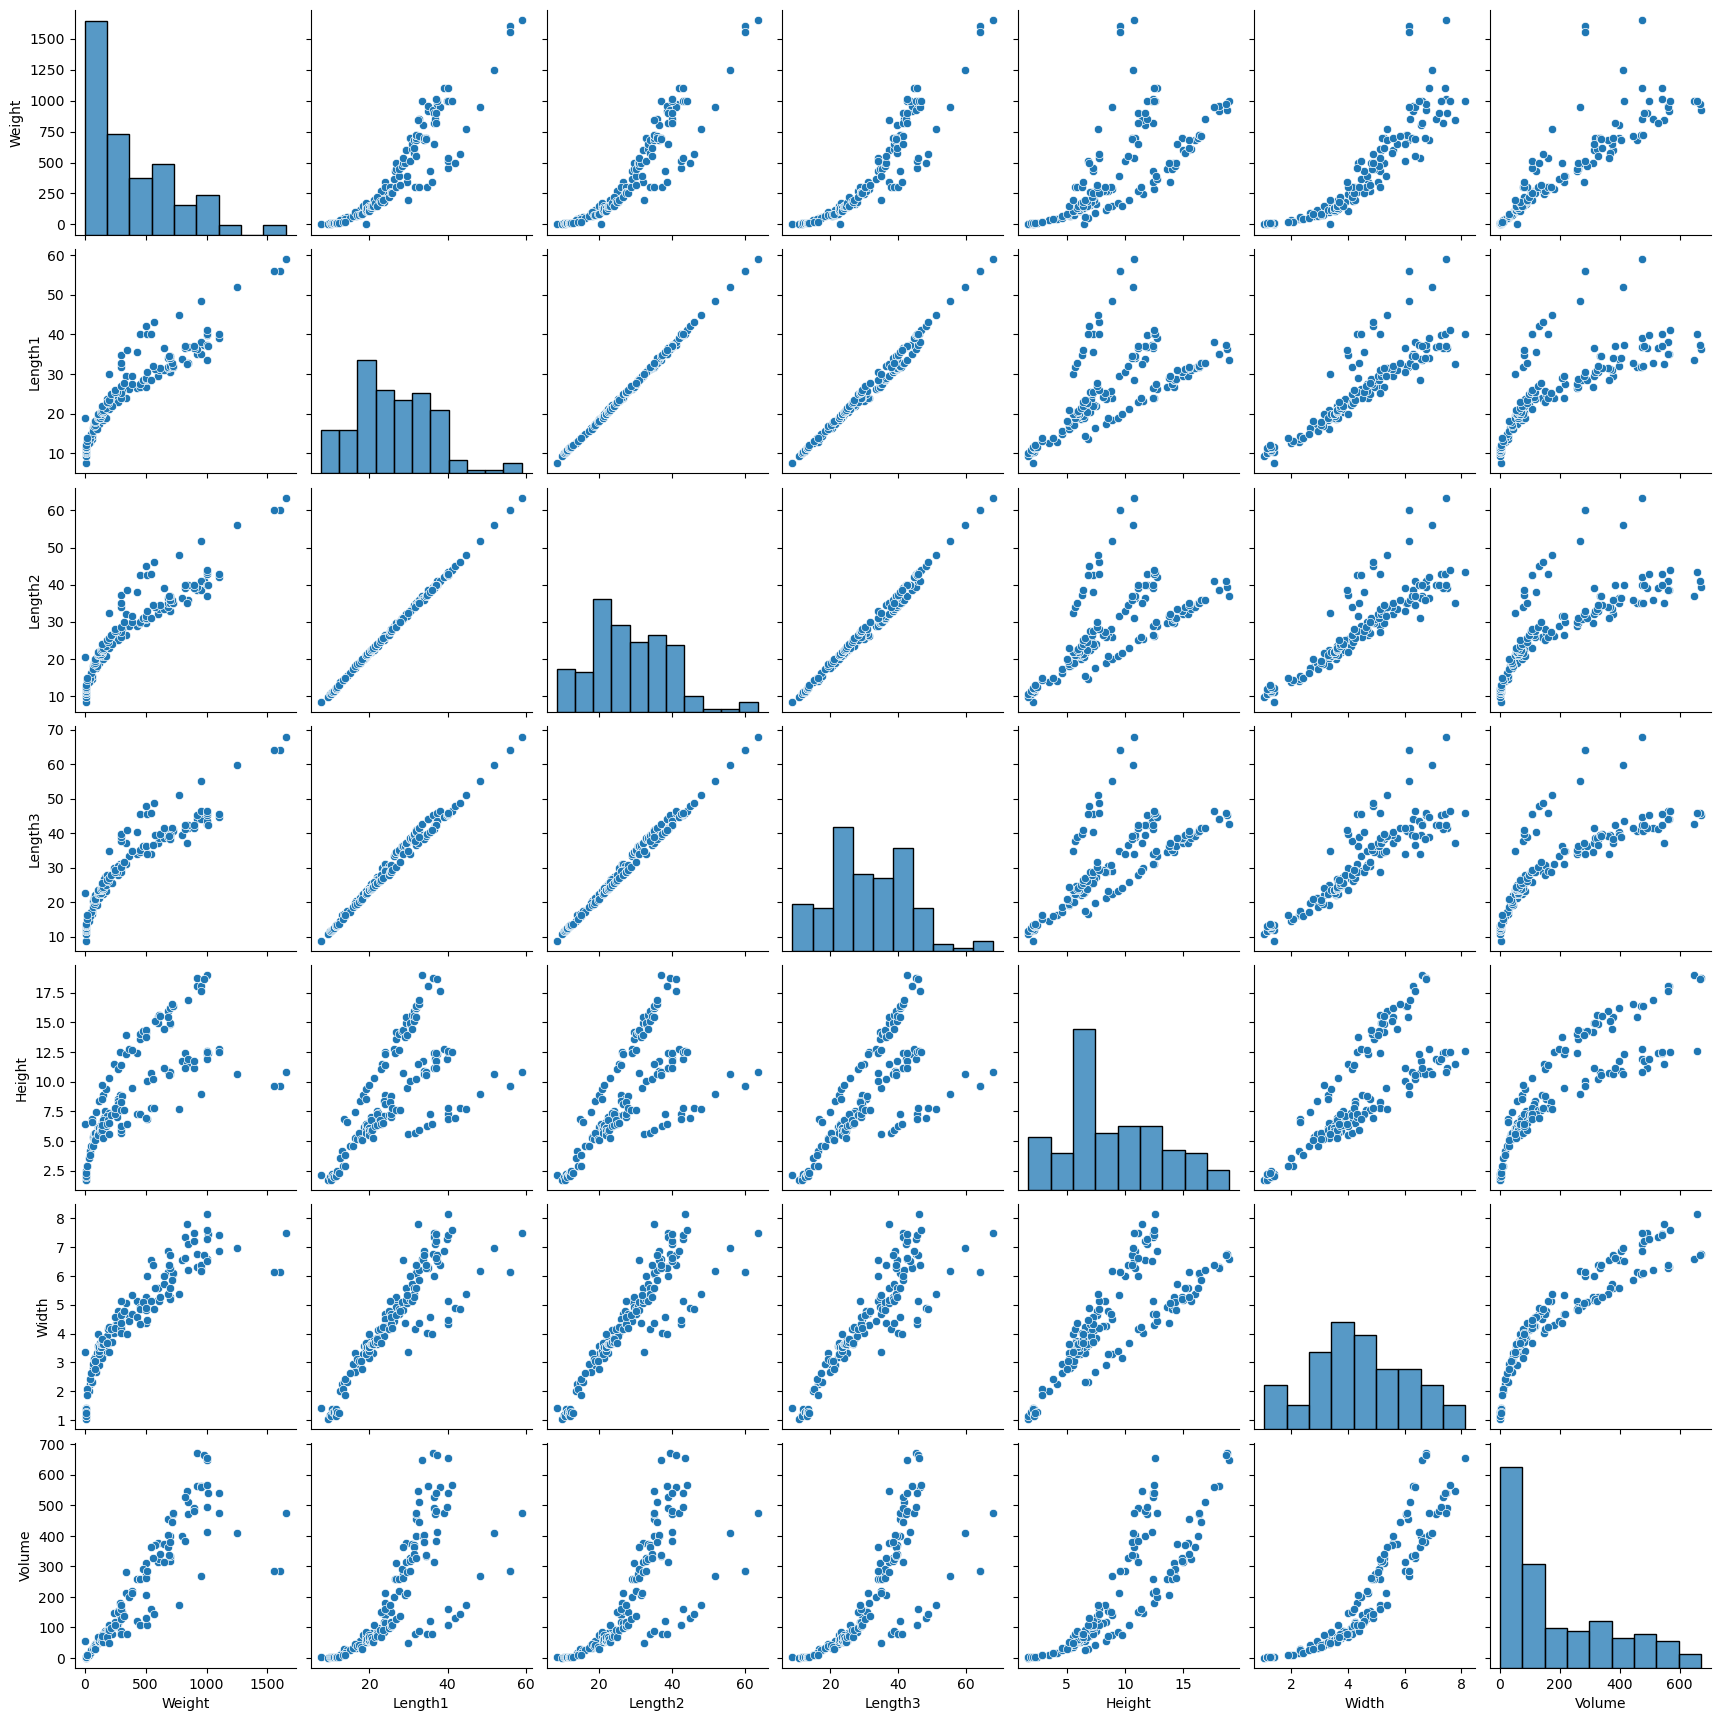

In [10]:
sns.pairplot(data)

### <span style="color:orange">Análsis:</span>

- **Coeficiente de Determinación (R2)**: Es alto para todas las especies, lo que indica que el modelo de regresión lineal con 'Volume' como predictor explica la variación del peso de los peces dentro de cada especie.

- **MSE y MAE**: La diferencia de valores entre las diferentes especies nos indica que para algunas el modelo es preciso, sin embargo para otras especies no es tan efectivo.

**Efectividad del Modelo**

El desempeño del modelo varía significativamente entre especies, esto es un indicador que la relación entre el volumen y el peso no es constante entre todas las especies de peces. Algunas especies pueden tener características adicionales o variaciones en la forma que no son reprensentadas por el volumen.

**Conclusión**:

El modelo funciona bien para la mayoría de las especies, pero la variabilidad en MSE, MAE y R² sugiere que sería conveniente buiscar un modelo que incluya variables que se enfoquen en características específicas de cada especie para mejorar la precisión y la generalización del modelo.

## <span style="color:blue">5.- Construcción de un modelo de regresión utilizando múltiples variables</span>

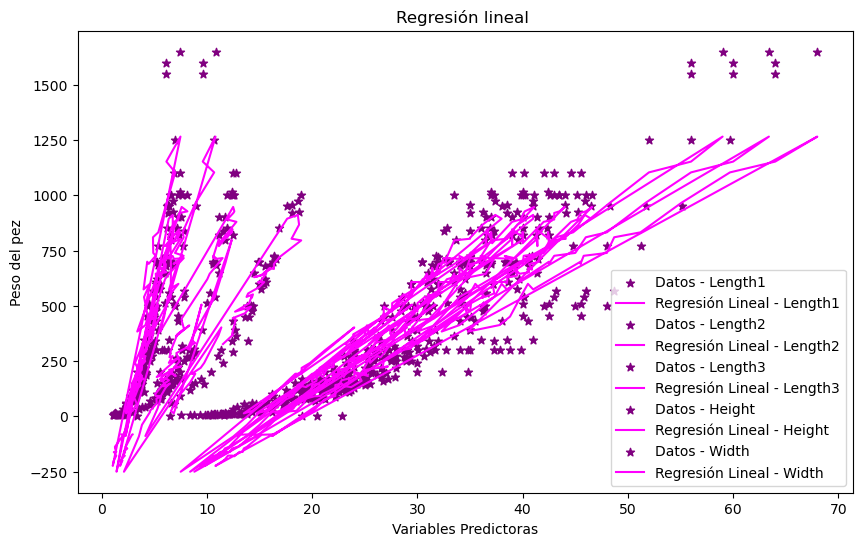

MSE (Error Cuadrático Medio): 14607.879
EMSE (Error Cuadrático Medio Explicado): 0.115
Coeficiente de Determinación (R2): 0.885
MAE (Error Absoluto Medio): 91.787


In [11]:
# Definir las variables predictoras que se utilizarán en el modelo de regresión múltiple

# Estas son las características del pez que se utilizarán para predecir el peso
variables_predictoras = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

# Aplicar la función de análisis de regresión utilizando las variables predictoras

# Aquí se pasa la lista de variables predictoras para que el modelo las utilice todas
resultados_multivariable = analisis_regresion(data, variables_predictoras)

# Imprimir los resultados obtenidos del modelo de regresión múltiple
print(resultados_multivariable)

In [ ]:
# Definir la variable dependiente (Y) y las variables independientes (X)
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y = data['Weight']

# Agregar una constante a X para incluir el término independiente (intercepto)
X = sm.add_constant(X)

# Crear el modelo OLS
model = sm.OLS(Y, X)

# Ajustar el modelo
results = model.fit()

# Mostrar el resumen de los resultados del modelo
print(results.summary())

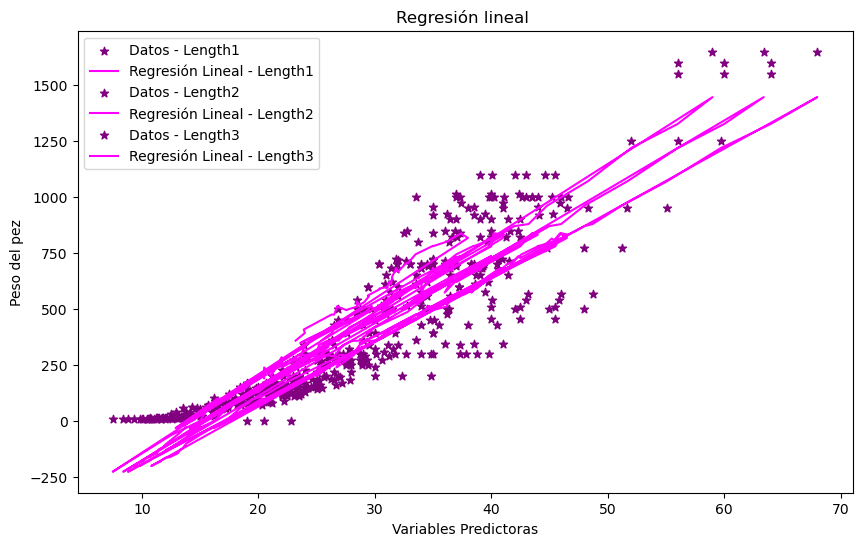

MSE (Error Cuadrático Medio): 18617.330
EMSE (Error Cuadrático Medio Explicado): 0.146
Coeficiente de Determinación (R2): 0.854
MAE (Error Absoluto Medio): 107.001


In [12]:
# Estas son las características del pez que se utilizarán para predecir el peso
variables_predictoras = ['Length1', 'Length2', 'Length3']

resultados_multivariable = analisis_regresion(data, variables_predictoras)
print(resultados_multivariable)


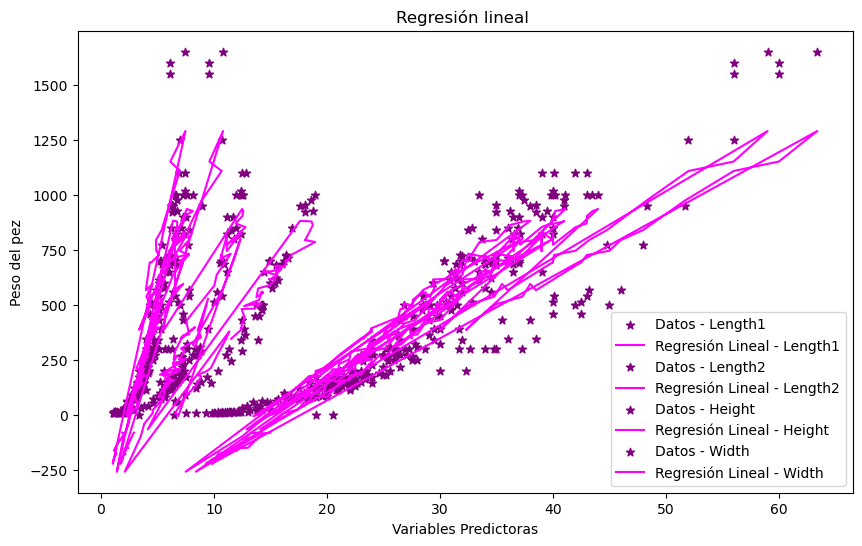

MSE (Error Cuadrático Medio): 14875.013
EMSE (Error Cuadrático Medio Explicado): 0.117
Coeficiente de Determinación (R2): 0.883
MAE (Error Absoluto Medio): 93.496


In [13]:
# Estas son las características del pez que se utilizarán para predecir el peso
variables_predictoras = ['Length1', 'Length2', 'Height', 'Width']

resultados_multivariable = analisis_regresion(data, variables_predictoras)
print(resultados_multivariable)


### <span style="color:orange">Evaluación del modelo:</span>

- Se utilizan 3 modelos con diferentes variables predictoras, donde se puede concluir que el mejor modelo es el primero (utiliza Length1, Length2, Length3, Height, y Width como variables predictoras), ya que ofrece el mejor rendimiento en R2 (0.885) y tiene un MAE más bajo. Esto sugiere que incluir todas estas variables proporciona un modelo más preciso.


- Consoderar el impacto de Excluir Variables:

    - Excluir Height y Width en el segundo modelo provocó un aumento significativo del MSE y del MAE, indicando que estas variables son importantes para la precisión del modelo.

    - Excluir Length3 en el tercer modelo produjo una ligera disminución del rendimiento del modelo, lo que sugiere que Length3 es una variable clave para predecir el peso de los peces.
    

Considerar también que en los tres modelos el MSE aún es alto, lo que confirma lo descrito anteriormente, y es que podrían haber otros factores o variables que no se están tomando en cuenta en el modelo. Se puede considerar incluir otras variables para mejorar la precisión del modelo.